# Анализ рынка заведений общественного питания Москвы

## 1. Обзор данных

**Импорты**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import re

import plotly.io as pio
pio.renderers.default = "png"

**Обновления**

In [2]:
# !pip install plotly --upgrade --user

**Таблицы**

In [3]:
df = pd.read_csv('rest_data.csv')

**Обзор**

In [4]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


**На предобработку**

1. Проверить значения в категориальных столбцах <code>chain</code> и <code>object_type</code>
2. Проверить диапозон значений в столбце <code>number</code>
3. Привести все строковые столбцы к нижнему регистру
4. Дубликаты

## 2. Предобработка

**Значения в категориальных столбцах <code>chain</code> и <code>object_type</code>**

In [6]:
df['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [7]:
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Все ок. Ничего лишнего

**Диапозон значений в столбце <code>number</code>**

In [8]:
df['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Все ок. Отрицательных нет.

**Строковые столбцы к нижнему регистру**

In [9]:
df['object_name'] = df['object_name'].str.lower()
df['address'] = df['address'].str.lower()

**Дубликаты**

In [10]:
print('Дубликатов в таблице:', df.duplicated().sum())

Дубликатов в таблице: 0


А если без столбца id?

In [11]:
print('Дубликатов в таблице:', df.drop('id', axis=1).duplicated(keep='last').sum())

Дубликатов в таблице: 85


Уберем их, оставляя более поздние записи

In [12]:
#отсортируем по порядку id
df = df.sort_values(by='id')

In [13]:
#удалим дубликаты, кроме последних
df.drop_duplicates(keep='last', inplace=True)

In [14]:
df.reset_index(drop=True, inplace=True)

**Таблица после предобработки**

In [15]:
df.head()

,id,object_name,chain,object_type,address,number
0,838,темпл бар,да,кафе,"город москва, первомайская улица, дом 33",356
1,5882,кафе «эссе»,нет,кафе,"город москва, никитинская улица, дом 13а",70
2,19613,бар азбука вкуса,да,бар,"город москва, мичуринский проспект, дом 22, ко...",6
3,19618,кафе «галладенс»,нет,кафе,"город москва, мичуринский проспект, дом 21, ко...",25
4,19619,бар-фитнес,нет,бар,"город москва, пятницкое шоссе, дом 29, корпус 5",24


## 3. Анализ данных

### Виды объектов общественного питания

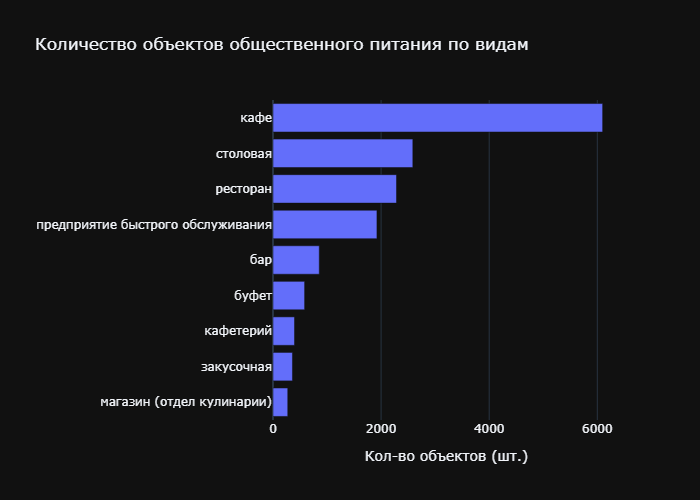

In [16]:
px.bar(df['object_type'].value_counts().reset_index().sort_values(by='object_type', ascending=True), 
       x='object_type',
       y='index',
       template='plotly_dark',
       title='Количество объектов общественного питания по видам',
       labels={'index':'', 'object_type':'Кол-во объектов (шт.)'},
       orientation='h',
       height=500)

В городе больше всего кафе. Затем идут столовые, рестораны и предприятия быстрого обслуживания. 

### Сетевые и несетевые заведения

In [17]:
#заменим "да" и "нет" на "сетевое" и "несетевое" для удобства отображения на графике
df['chain'] = df['chain'].replace({'да':'сетевое'})
df['chain'] = df['chain'].replace({'нет':'несетевое'})

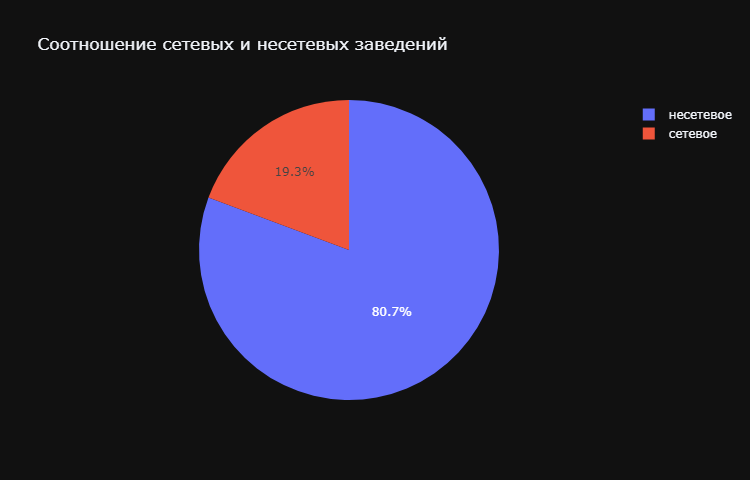

In [18]:
px.pie(df['chain'].value_counts().reset_index(), 
       values='chain',
       names='index',
       template='plotly_dark',
       title='Соотношение сетевых и несетевых заведений',
       labels={'index':'Тип заведения', 'chain':'Кол-во заведений (шт.)'},
       height=480,
      width=750)

Несетевых заведений практически в 4 раза больше. 

### Виды и типы заведений
Для какого вида объекта общественного питания характерно сетевое распространение?

In [19]:
#найдем количество всех заведений для каждого типа
object_type_count = df.groupby('object_type')\
    .agg({'id':'count'})

In [20]:
#найдем количество сетевых заведений для каждого типа
object_type_chain_count = df.query('chain == "сетевое"')\
    .groupby('object_type')\
    .agg({'id':'count'})

In [21]:
#найдем долю сетевых заведений для каждого типа
object_type_chain_ratio = (object_type_chain_count / object_type_count).reset_index().rename(columns={'id':'ratio'})
#округлим для удобства отображения
object_type_chain_ratio['ratio'] = object_type_chain_ratio['ratio'].round(2)

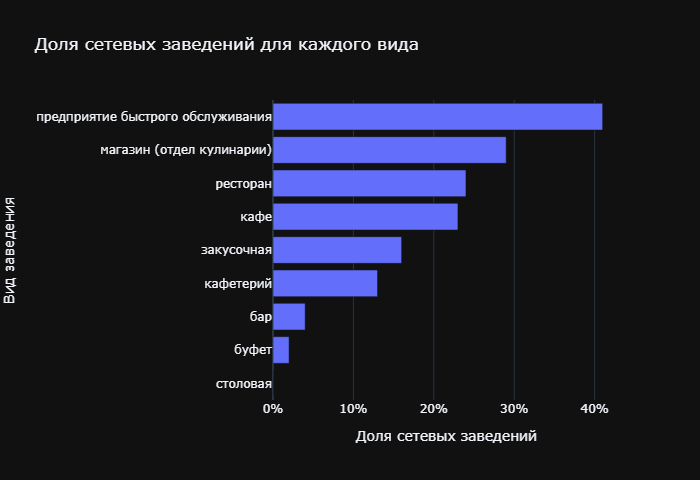

In [22]:
fig = px.bar(object_type_chain_ratio.sort_values(by='ratio', ascending=True),
      x='ratio',
      y='object_type',
      template='plotly_dark',
      orientation='h',
      title='Доля сетевых заведений для каждого вида',
      labels={'object_type':'Вид заведения', 'ratio':'Доля сетевых заведений'},
      height=480)

fig.update_layout(xaxis_tickformat = '2%')

fig.show()

**Сетевое распространение характерно для:**
- Предприятий быстрого обслуживания
- Магазинов
- Ресторанов
- Кафе

Сетевых столовых кстати нет вообще:)

### Посадочные места в сетевых заведениях

In [23]:
#подготовим таблицу для графика
seatsInChainObjects = df.query('chain == "сетевое"')\
    .groupby('object_name', as_index=False)\
    .agg({'id':'count', 'number':'mean'})\
    .rename(columns={'id':'object_count', 'number':'mean_seats'})

In [24]:
#Шаг 1. Избавимся от сетей, в которых всего 1 заведение. Ведь это получается и не сети вовсе
seatsInChainObjects = seatsInChainObjects.query('object_count > 1')

In [25]:
#Шаг 2. Найдем границы для разделения сетей (по количеству заведений и числу мест)
#Значением-границей в обоих случаях будет являться 70-ый перцентиль. 

#граница по количеству заведений в сети
objects_count_border = np.percentile(seatsInChainObjects['object_count'], 70)

#граница по числу посадочных мест
seats_count_border = np.percentile(seatsInChainObjects['mean_seats'], 70)

In [26]:
#Шаг 3. Разделим данные на 4 группы по количеству мест и заведений и посчитаем кол-во в каждой группе
print('Мало заведений, мало мест:', 
      seatsInChainObjects.query('object_count <= @objects_count_border & mean_seats <= @seats_count_border').shape[0],
      'сетей')

print('Мало заведений, много мест:', 
      seatsInChainObjects.query('object_count <= @objects_count_border & mean_seats > @seats_count_border').shape[0],
      'сетей')

print('Много заведений, мало мест:', 
      seatsInChainObjects.query('object_count > @objects_count_border & mean_seats <= @seats_count_border').shape[0],
      'сетей')

print('Много заведений, много мест:', 
      seatsInChainObjects.query('object_count > @objects_count_border & mean_seats > @seats_count_border').shape[0],
      'сетей')

Мало заведений, мало мест: 121 сетей
Мало заведений, много мест: 56 сетей
Много заведений, мало мест: 51 сетей
Много заведений, много мест: 18 сетей


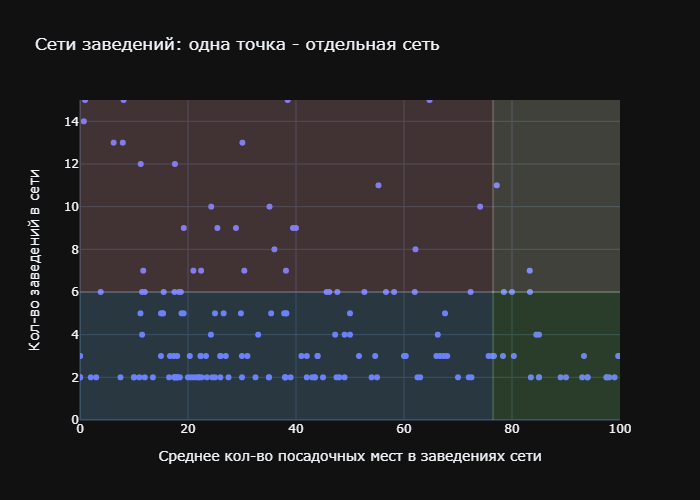

In [27]:
fig = go.Figure()

#сам график
fig.add_trace(go.Scatter(x = seatsInChainObjects['mean_seats'],
                         y = seatsInChainObjects['object_count'],
                         mode='markers'))
#полупрозрачные квадраты 
fig.add_shape(type="rect",
    x0=0, y0=0, x1=seats_count_border, y1=objects_count_border,
    fillcolor="LightSkyBlue",
    line_color="LightSkyBlue",
    opacity=0.2,
              
)

fig.add_shape(type="rect",
    x0=0, y0=objects_count_border, x1=seats_count_border, y1=160,
    fillcolor="LightPink",
    line_color="LightPink",
    opacity=0.2,
              
)

fig.add_shape(type="rect",
    x0=seats_count_border, y0=objects_count_border, x1=300, y1=160,
    fillcolor="LightYellow",
    line_color="LightYellow",
    opacity=0.2,
              
)

fig.add_shape(type="rect",
    x0=seats_count_border, y0=0, x1=300, y1=objects_count_border,
    fillcolor="LightGreen",
    line_color="LightGreen",
    opacity=0.2,
              
)

#настройки графика
fig.update_layout(title='Сети заведений: одна точка - отдельная сеть',
                  xaxis_title="Среднее кол-во посадочных мест в заведениях сети",
                  yaxis_title="Кол-во заведений в сети",
                  template="plotly_dark",
                  showlegend=False,
                  xaxis_range=[0,100],
                  yaxis_range=[0,15]
                 )

fig.show()

**Для сетей характерно:** малое количество заведений (меньше 7) с малым количеством посадочных мест (до 77).

### Среднее количество посадочных мест для разных видов объектов

**Предобработка.**
Перед тем как описать среднее - посмотрим на распределение количества посадочных мест в заведениях по каждому виду. 

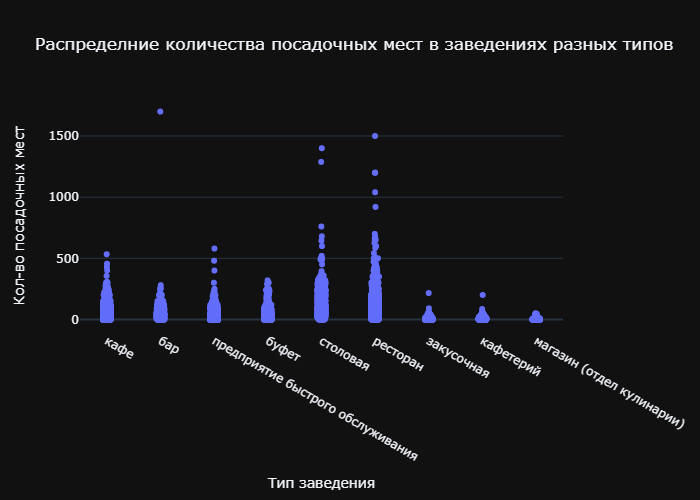

In [28]:
px.strip(df, 
       x='object_type', 
       y='number',
       template='plotly_dark',
       title='Распределние количества посадочных мест в заведениях разных типов',
       labels={'number':'Кол-во посадочных мест', 'object_type':'Тип заведения'})

**Уберем из таблицы совсем уж яркие выбросы** для каждого типа:
- 1700 мест для бара
- 1400 и 1288 мест для столовой
- 1500, 1200, 1040 и 920 мест для ресторана
- 200 мест для кафетерия
- 216 мест для закусочной

In [29]:
print('Процент удаляемых значений:{:.2%}'.format(9 / len(df)))

Процент удаляемых значений:0.06%


In [30]:
#вынесем неповторяющиеся количества в отдельный список
unusual_number = [1700, 1400, 1288, 1500, 1200, 1040, 920]

#оставим в таблице все строки, кроме тех, что содержат выбросы
df = df.query('number not in @unusual_number')

In [31]:
#найдем индексы строк для 200 и 216 мест и сразу передадим их методу drop
df.drop(df.query('number == 216 & object_type == "закусочная"').index, inplace=True)
df.drop(df.query('number == 200 & object_type == "кафетерий"').index, inplace=True)

Готово! Теперь опишем среднее количество посадочных мест для каждого типа заведения. Использовать будем среднеарифметическое. 

**Расчеты и график**

In [32]:
#подготовим табличку для графика
objectTypeMeanSeats = df.groupby('object_type', as_index=False)\
    .agg({'number':'mean'})\
    .rename(columns={'number':'mean_number'})\
    .sort_values(by='mean_number', ascending=True)

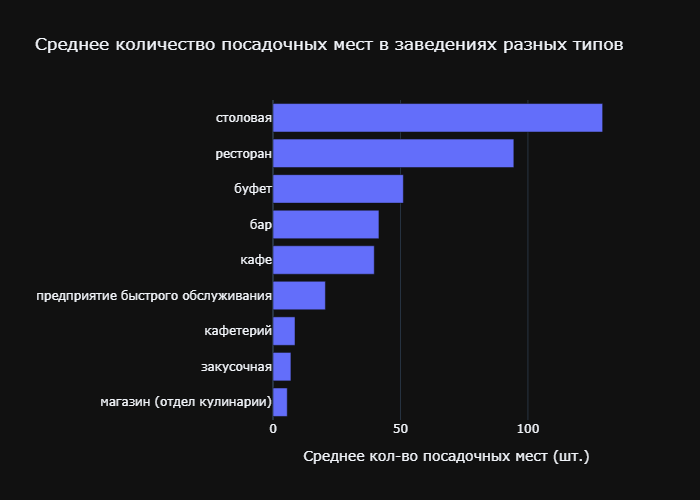

In [33]:
px.bar(objectTypeMeanSeats,
      x='mean_number',
      y='object_type',
      template='plotly_dark',
      title='Среднее количество посадочных мест в заведениях разных типов',
      labels={'object_type':'', 'mean_number':'Среднее кол-во посадочных мест (шт.)'},
      orientation='h')

**В среднем, больше всего посадочных мест** встречается в столовых и ресторанах.

### Топ-10 улиц по количеству объектов общественного питания
- Показать топ-10 улиц по количеству объектов общественного питания
- В каких районах находятся эти улицы?

**Подготовка данных**

Первым шагом необходимо выделить информацию об улице в отдельный столбец. 
- Адреса указаны в формате "город, улица, дом/корпус и т.д."
- Т.е. каждая часть адреса разделена друг от друга запятой
- Значит нам нужно найти все части адреса (между запятыми) и взять только вторую
- Но есть исключения. Иногда после названия "город москва" идет не улица, а название административной единицы внутри москвы (город зеленоград, город троицк, поселение московский), и только затем название улицы
- В таком случае брать только название улицы не совсем корректно, ведь, к примеру, в "город москва" и в "город москва, город зеленоград" могут быть улицы с одинаковыми названиями. Заведения по ним просуммируются.
- Кроме того, бывает так, что город вообще не указан и адрес сразу начинается с улицы

Что делаем: 
1. Выносим в отдельный столбец не только улицу но и административную единицу
2. Если в адресе нет наименования города, то автоматически присваем ему "город москва". Это допущение, но необходимое

In [34]:
#функция получает строку, а возвращает наименование админ.единицы и улицы
def cityUnit_and_street_detector(row):
    #сохраняем в отдельную переменную строку с адресом
    address = row['address']
    #делим весь адрес на составляющие
    address = address.split(', ')
    #объявляем наименования админ.единиц, наличие которых нужно проверить
    city_unit_find_names = {'город', 'поселение', 'поселок', 'село'}
    
    #проверяем, содержит ли адрес название города
    #берем первую часть адреса и проверяем что внутри: улица или наименование административной единицы
    #используем isdisjoint(): он возвращает True, если в рассматриваемом множестве... 
    #...не найдено элементов, присутствующих в указанном объекте.
    if city_unit_find_names.isdisjoint(address[0].split()):
        #если совпадений не найдено, значит в нашей строке нет названия админ.единицы
        #а первый элемент строки - и есть улица
        #в таком случае объявляем админ.единицей "город москва"
        city_unit = 'город москва'
        #а первый элемент записываем как улицу
        street = address[0]
    
    else:
        #если же в адресе есть название города, то нужно понять - какое из них взять - первое или второе
        if city_unit_find_names.isdisjoint(address[1].split()):
            #если во второй части совпадений не найдено, значит здесь хранится адрес
            #в таком случае сохраняем первую часть как админ.единицу
            city_unit = address[0]
            #а вторую - как улицу
            street = address[1]
        else:
            #иначе, сохраняем вторую часть как админ.единицу
            city_unit = address[1]
            #и третью - как улицу
            street = address[2]
    
    return (city_unit, street)

In [35]:
#применим функцию к каждой строке и сохраним в отдельных столбцах
df[['city_unit','street']] = df.apply(cityUnit_and_street_detector, axis=1, result_type='expand')

**Расчеты и график**

In [36]:
#посчитаем кол-во объектов по каждой улице и отсортируем по убыванию
#группировать будем не только по улице, но и по админ единице
objectsPerStreet = df.groupby(['city_unit','street'], as_index=False)\
    .agg({'id':'count'})\
    .rename(columns={'id':'object_count'})\
    .sort_values(by='object_count', ascending=False)

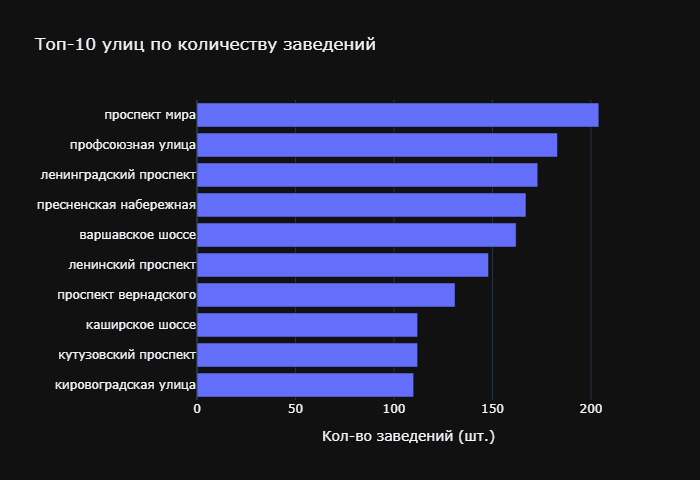

In [37]:
#выведем 10 топовых улиц по количеству заведений
px.bar(objectsPerStreet.head(10).sort_values(by='object_count', ascending=True),
      x='object_count',
      y='street',
      template='plotly_dark',
      title='Топ-10 улиц по количеству заведений',
      labels={'street':'', 'object_count':'Кол-во заведений (шт.)'},
      orientation='h',
      height=480)

Предварительный вывод: большое количество заведений расположенно на проспектах и шоссе, потому что это очень протяженные улицы. 

**В каких районах Москвы находятся эти улицы?**

Для ответа на этот вопрос нам нужны внешние данные о районах для каждой улицы. Такие данные есть в таблице по этой ссылке: 
https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y.
Присоединим их и найдем ответ на вопрос. 

**Выгрузим и посмотрим дополнительную таблицу**

In [38]:
moscow_area_data = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y')
moscow_area_data.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [39]:
moscow_area_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   streetname  4398 non-null   object
 1   areaid      4398 non-null   int64 
 2   okrug       4398 non-null   object
 3   area        4398 non-null   object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


**Предобработаем таблицу** <code>moscow_area_data</code>

In [40]:
#приведем строковые столбцы к нижнему регистру
moscow_area_data['streetname'] = moscow_area_data['streetname'].str.lower()
moscow_area_data['area'] = moscow_area_data['area'].str.lower()
moscow_area_data['okrug'] = moscow_area_data['okrug'].str.lower()

In [41]:
#проверим дубликаты
print('Дубликатов в таблице:', moscow_area_data.duplicated().sum())

Дубликатов в таблице: 8


In [42]:
#дропнем дубликаты
moscow_area_data.drop_duplicates(inplace=True)

**Районы, в которых находятся ТОП-10 улиц по количеству заведений**

In [43]:
objectsPerStreet.head(10).merge(moscow_area_data, left_on='street', right_on='streetname')['area'].unique()

array(['алексеевский район', 'ярославский район', 'район марьина роща',
       'останкинский район', 'район ростокино', 'район свиблово',
       'мещанский район', 'академический район', 'район черемушки',
       'район ясенево', 'район коньково', 'обручевский район',
       'район теплый стан', 'район аэропорт', 'район беговой',
       'хорошевский район', 'район сокол', 'пресненский район',
       'район чертаново центральное', 'район чертаново северное',
       'район чертаново южное', 'донской район',
       'район нагатино-садовники', 'нагорный район',
       'район северное бутово', 'район южное бутово',
       'район проспект вернадского', 'район тропарево-никулино',
       'район гагаринский', 'ломоносовский район', 'район якиманка',
       'район раменки', 'район дорогомилово', 'район фили-давыдково',
       'район москворечье-сабурово', 'район орехово-борисово южное',
       'район орехово-борисово северное'], dtype=object)

Стоит отметить, что такой большой список получился еще и потому, что наши протяженные улицы попадают сразу в несколько районов. Один только Проспект Мира проходит в 8 районах. 

In [44]:
#найдем количество районов для каждой улицы
areaCountPerStreet = objectsPerStreet.merge(moscow_area_data, left_on='street', right_on='streetname')\
    .groupby(['city_unit','street'], as_index=False)\
    .agg({'area':'count'})\
    .rename(columns={'area':'area_count'})

In [45]:
#объединим в один фрейм с количеством заведений на каждой улице
densityRateFrame = objectsPerStreet.merge(areaCountPerStreet, on=['city_unit', 'street'])

In [46]:
#найдем оценку плотности
densityRateFrame['density_rate'] = (densityRateFrame['object_count'] / densityRateFrame['area_count']).round(2)

In [47]:
#оставим только топ-10 улиц по плотности в отдельном фрейме
top10densityStreets = densityRateFrame.sort_values(by='density_rate', ascending=False).head(10)

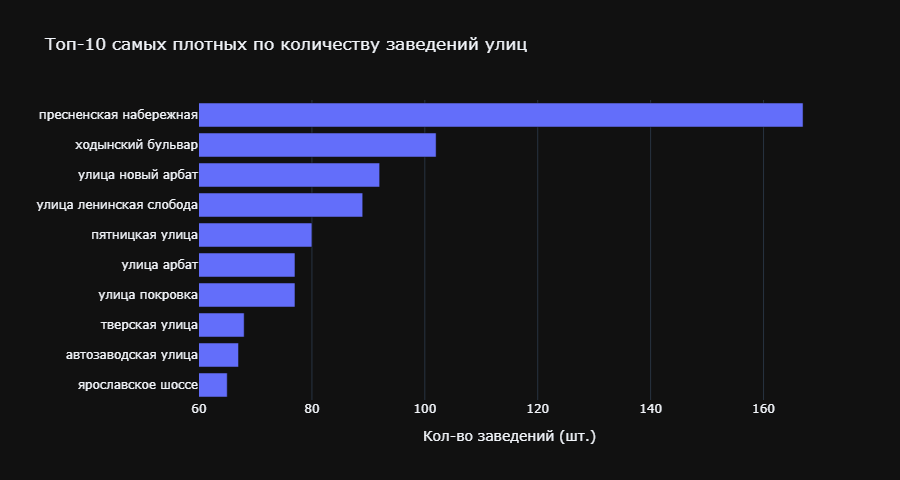

In [48]:
#выведем топ-10 на графике (но показывать будем не плотность, а количество заведений, хотя это скорее всего одинаковые цифры)
fig = px.bar(top10densityStreets.sort_values(by='object_count', ascending=True),
      x='object_count',
      y='street',
      template='plotly_dark',
      title='Топ-10 самых плотных по количеству заведений улиц',
      labels={'street':'', 'object_count':'Кол-во заведений (шт.)'},
      orientation='h',
      height=480,
            width=900)

fig.update_layout(xaxis_range=[60,170])

fig.show()

Ну, кстати:
- Пресненская набережная - это Москва-Сити, логично
- Арбат (новый и старый) - понятно, прогулочные улицы
- Пятницкая и Тверская так вообще - одни из центральных

Плюс-минус что-то близкое к правде, наверное

### Улицы с одним объектом общественного питания
- Число улиц с одним объектом общественного питания. 
- В каких районах Москвы находятся эти улицы?

In [49]:
print('В Москве {} улицы с одним объектом общественного питания:'.format(len(objectsPerStreet.query('object_count == 1'))))

В Москве 693 улицы с одним объектом общественного питания:


**Районы Москвы, в которых находятся улицы с 1 объектом**

In [50]:
#найдем количество районов для каждой улицы
areaCountPerStreet = objectsPerStreet.merge(moscow_area_data, left_on='street', right_on='streetname')\
    .groupby(['city_unit','street'], as_index=False)\
    .agg({'area':'count'})\
    .rename(columns={'area':'area_count'})

In [51]:
#сохраним в отдельный фрейм только те улицы, на которых находятся по одному заведению
#присоединим название района для каждой улицы
oneObjectStreets = objectsPerStreet.query('object_count == 1').merge(moscow_area_data, left_on='street', right_on='streetname')\
    [['city_unit', 'street', 'area']]

In [52]:
#cгруппируем по районам, посчитаем кол-во улиц и возьем только топовые 10 райнов
top10oneObjectAreas = oneObjectStreets.groupby('area', as_index=False)\
    .agg({'street':'count'})\
    .rename(columns={'street':'streets_count'})\
    .sort_values(by='streets_count', ascending=False)\
    .head(10)

In [53]:
#посмотрим на них
top10oneObjectAreas['area']

97        таганский район
3         басманный район
82        район хамовники
21      пресненский район
98         тверской район
52     район марьина роща
22            район арбат
13        мещанский район
76       район сокольники
34    район замоскворечье
Name: area, dtype: object

In [54]:
#прежде чем смотреть на карте, попробуем оценить расположение по округам
#добавим к каждому району наименование округа
top10oneObjectAreas.merge(moscow_area_data[['area','okrug']], on='area').drop_duplicates().reset_index(drop=True)

,area,streets_count,okrug
0,таганский район,27,цао
1,басманный район,26,цао
2,район хамовники,26,цао
3,пресненский район,20,цао
4,тверской район,20,цао
5,район марьина роща,18,свао
6,район арбат,18,цао
7,мещанский район,15,цао
8,район сокольники,15,вао
9,район замоскворечье,14,цао


**Вывод**

Топ-10 районов, которые содержат наибольшое количество улиц с одним заведением, находятся в центре города в пределах ТТК. Лишь два района из списка лежит в других округах. Получился контринтуитивный вывод. Я ожидал увидеть их на окраинах города. Допускаю такую причину: в центре города в принципе больше заведений, чем на окраинах, поэтому вероятность найти улицу с одним заведением в центре куда выше. 

### Количество посадочных мест для улиц с большим количеством заведений

In [55]:
#возьмем в рассмотрение даже не 10, а 20 улиц с самым большим количеством заведений top10streets
top20streets = objectsPerStreet.head(20)['street'].unique()

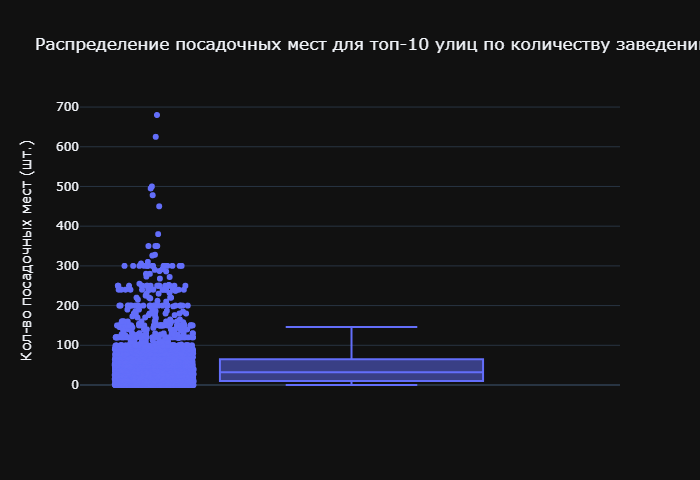

In [56]:
px.box(df.query('city_unit == "город москва" & street in @top20streets'),
       y="number", 
       points="all",
       template='plotly_dark',
       title="Распределение посадочных мест для топ-10 улиц по количеству заведений",
       labels={'number':'Кол-во посадочных мест (шт.)'},
       height=480)

- Больше чем 400 посадочных мест в таких заведениях - большая редкость
- Скорее всего, в заведении на топовой улице будет от 10 до 65 мест

In [57]:
top10streets = objectsPerStreet.head(10)['street'].unique()

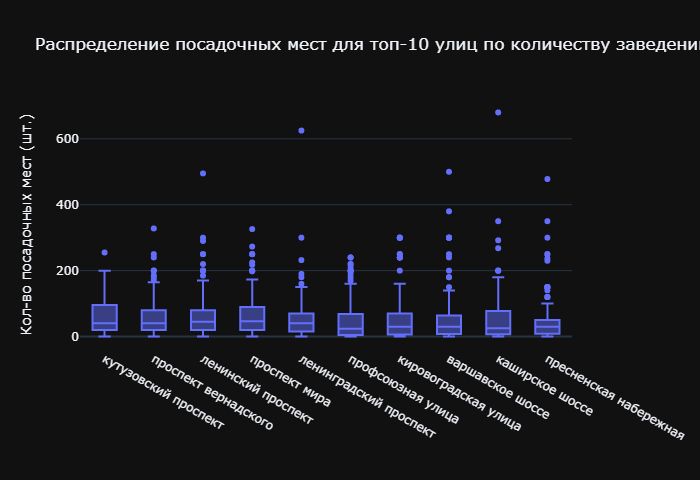

In [58]:
px.box(df.query('city_unit == "город москва" & street in @top10streets'),
       y="number",
       x='street',
       template='plotly_dark',
       title="Распределение посадочных мест для топ-10 улиц по количеству заведений",
       labels={'number':'Кол-во посадочных мест (шт.)', 'street':''},
       height=480)

Чисто визуально видим, что на пресненской набережной межквартильный размах самый узкий. То есть разброс по посадочным местам самый небольшой. А на кутузовском и профсоюзной нет заведений с количеством посадочных мест больше 255. 

## Общий вывод

В этом проекте мы исследовали рынок заведений общественного питания в Москве. Все для того, чтобы подготовить аналитику, представить её инвесторам и получить деньги на открытие нашего оригинального кафе. 

**Что узнали:**
- В Москве больше всего кафе. Далее по количеству идут столовые, рестораны и предприятия быстрого обслуживания; 
- Несетевых заведений практически в 4 раза больше, чем сетевых;
- Сетевое же распространение характерно для предприятий быстрого обслуживания, магазинов, ресторанов, кафе;
- Для сетей характерно малое количество заведений (меньше 7) с малым количеством посадочных мест (до 77).
- В среднем, больше всего посадочных мест встречается в столовых и ресторанах;
- Больше всего заведений находится на проспектах и шоссе: скорее всего дело еще и в том, что это просто очень протяженные улицы;
- В городе 693 улицы на которых находится только 1 объект;
- Топ-10 районов, которые содержат наибольшое количество улиц с одним заведением, находятся в центре города в пределах ТТК (в ЦАО)
- Количество посадочных мест в заведениях на топовых улицах скорее всего лежит в диапозоне от 10 до 65;

**Рекомендации:**
1. Заведение с такой оригинальной идеей скорее всего требует расположения в центральных районах города. Наша идея сейчас не столько про "поесть", сколько про "фудинтертейнмент", а в этом случае - нужен охват и узнаваемость. 
2. Задумывать такое заведение в формате сети, на мой взгляд, рационально только в том случае, если такой формат финансово более выгоден, нежели заведение с официантами-людьми. Тогда это похоже на модель, котрую можно масштабировать (косты меньше за счет работы роботов). Ради развлечения люди сходят 1 раз, а постоянно будут посещать, только если у нас будет вкусно и выгодно. В общем, для начала, это в любом случае должно быть только одно заведение. 
3. Какой это будет вид объекта - зависит скорее от нашего позиционирования, нежели от количества объектов разного вида в городе. Но, понимая концепцию, скорее всего, стоит рассмотреть формат ресторана, кафе или бара. Вряд ли кто-то ожидает обслуживания от роботов в столовой или закусочной :)